In [1]:
from algo_gen import algo_genetique
from algo_four import algo_fourmis
import numpy as np
from random import randint
from time import time
import matplotlib.pyplot as plt
from IPython import display

In [2]:
# Chargement de la matrice adjacence à partir d'un fichier
def load_matrix():
    mat = []
    with open('mat_adjacence', 'r') as file:   
        for l in file.readlines():  
            val = [int(x) for x in l.split()]
            mat.append(val)            
    return mat

# Créer une matrice d'adjacence dont le cout du circuit Hamiltonien optimal est celui de la périphérie  
def create_matrix(n_ville):
    mat = np.zeros((n_ville, n_ville))
    
    for i in range(n_ville):
        for j in range(i, n_ville):
            cout = randint(2, 10)
            if i == j:
                cout = 0
            i_after = i+1 if i+1 < n_ville else 0
            if i_after == j:
                cout = 1
                 
            mat[i][j] = cout
            mat[j][i] = cout
    mat[n_ville-1][0] = 1
    mat[0][n_ville-1] = 1

    return mat
 

In [3]:
algo_fourmis(create_matrix(7), verbal=True)

Matrice d'adjacence:
[[ 0.  1.  9.  3.  7.  9.  1.]
 [ 1.  0.  1.  7. 10. 10.  7.]
 [ 9.  1.  0.  1.  8.  8.  7.]
 [ 3.  7.  1.  0.  1.  8.  6.]
 [ 7. 10.  8.  1.  0.  1. 10.]
 [ 9. 10.  8.  8.  1.  0.  1.]
 [ 1.  7.  7.  6. 10.  1.  0.]]
iteration:  0 , meilleurs chemins: 7.0
iteration:  1 , meilleurs chemins: 7.0
iteration:  2 , meilleurs chemins: 7.0
iteration:  3 , meilleurs chemins: 7.0
iteration:  4 , meilleurs chemins: 7.0
iteration:  5 , meilleurs chemins: 7.0
iteration:  6 , meilleurs chemins: 7.0
iteration:  7 , meilleurs chemins: 7.0
iteration:  8 , meilleurs chemins: 7.0
iteration:  9 , meilleurs chemins: 7.0
iteration:  10 , meilleurs chemins: 7.0
iteration:  11 , meilleurs chemins: 7.0
iteration:  12 , meilleurs chemins: 7.0
iteration:  13 , meilleurs chemins: 7.0
iteration:  14 , meilleurs chemins: 7.0
iteration:  15 , meilleurs chemins: 7.0
iteration:  16 , meilleurs chemins: 7.0
iteration:  17 , meilleurs chemins: 7.0
iteration:  18 , meilleurs chemins: 7.0
iteration: 

([0, 1, 2, 3, 4, 5, 6], 7.0)

In [4]:
algo_genetique(create_matrix(7), time_max=100, verbal=True)

[[ 0.  1.  2.  5.  6.  7.  1.]
 [ 1.  0.  1.  5.  2.  2.  3.]
 [ 2.  1.  0.  1.  7.  4.  5.]
 [ 5.  5.  1.  0.  1.  7. 10.]
 [ 6.  2.  7.  1.  0.  1. 10.]
 [ 7.  2.  4.  7.  1.  0.  1.]
 [ 1.  3.  5. 10. 10.  1.  0.]]
iteration: 1 , nb individu: 20 val_min : 19.0
iteration: 2 , nb individu: 20 val_min : 15.0
iteration: 3 , nb individu: 20 val_min : 15.0
iteration: 4 , nb individu: 19 val_min : 15.0
iteration: 5 , nb individu: 19 val_min : 14.0
iteration: 6 , nb individu: 18 val_min : 14.0
iteration: 7 , nb individu: 17 val_min : 17.0
iteration: 8 , nb individu: 18 val_min : 13.0
iteration: 9 , nb individu: 19 val_min : 13.0
iteration: 10 , nb individu: 15 val_min : 17.0
iteration: 11 , nb individu: 20 val_min : 17.0
iteration: 12 , nb individu: 19 val_min : 12.0
iteration: 13 , nb individu: 20 val_min : 13.0
iteration: 14 , nb individu: 20 val_min : 17.0
iteration: 15 , nb individu: 17 val_min : 7.0
iteration: 16 , nb individu: 20 val_min : 16.0
iteration: 17 , nb individu: 18 val_min 

([1, 6, 0, 2, 3, 4, 5], 11.0)

In [5]:
def test_acc(algo, mat_size = 5, n_try=1, time_max=100): 
    """
    Test l'algorithme d'exploration avec des matrice dont le chemin au cout optimal correspond à la périphérie, et retourne l'accuracy moyen
        mat_size : taille de la matrice d'adjacence qui sera exploré
        n_try : Nombre de test effectué
    """
    acc = 0 
    # On test plusieurs fois et on obtient
    for _ in range(n_try):
        cost_mat = create_matrix(mat_size)
        # Accuracy = meilleur chemin / chemin trouvé par l'algo 
        acc += mat_size / algo(cost_mat, time_max=time_max, verbal=False)[1] # en sachant que par construction: Taille optimal = taille de matrice    
        
    return acc / n_try

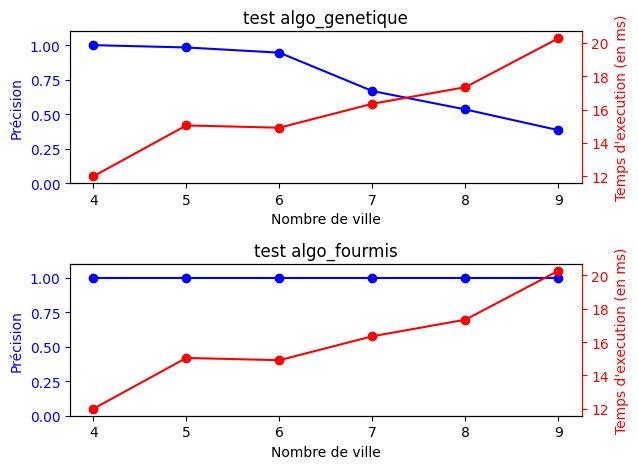

In [6]:
def main_test(algorithmes, n_city_start = 4, n_city_end = 10): 
    """
    Effectue des tests sur une liste d'algorithme, et affiche sous la forme de diagrame l'évolution des tests (avec precision et temps d'execution)
    algorithmes : Liste des fonctions avec comme paramètre la matrice de coût et le temps optimal
        Chacune de ses fonctions doivent retourné le chemins optimal et le coût sous la forme d'un tuple.
    """
    
    accuracies = [[] for _ in algorithmes]
    times = [[] for _ in algorithmes]  
    mat_sizes = [[] for _ in algorithmes]
     
     
    for size in range(n_city_start, n_city_end, 1): 
        for i, algo in enumerate(algorithmes):
            start_time = time()
            accuracies[i].append(test_acc(algo=algo, mat_size=size, n_try=100, time_max=50))
            times[i].append(time()-start_time) 
            
        fig, ax = plt.subplots(len(algorithmes))
        if len(algorithmes) == 1:
            ax = np.array([ax]) 
        
        for i in range(len(algorithmes)):
            mat_sizes[i].append(size)
            # Précision
            ax[i].plot(mat_sizes[i], accuracies[i], "-bo")
            ax[i].set_title("test " + algorithmes[i].__name__) 
            ax[i].set_xlabel("Nombre de ville")
            ax[i].set_ylabel("Précision") 
            ax[i].set_ylim(0, 1.1)
            
            # Coloration left
            ax[i].spines["left"].set_color('blue') 
            ax[i].yaxis.label.set_color('blue') 
            ax[i].tick_params(axis='y', colors='blue') 
            
            # Temps d'execution
            ax2 = ax[i].twinx()
            ax2.plot(mat_sizes[i], times[0], "-ro") 
            ax2.set_xlabel("Nombre de ville")
            ax2.set_ylabel("Temps d'execution (en ms)") 
            
            # Coloration right
            ax2.yaxis.label.set_color('red') 
            ax2.tick_params(axis='y', colors='red')
            ax2.spines["right"].set_color('red')
        
        fig.tight_layout()
        display.clear_output(wait=True) 
        plt.show() 
        
        
        #plt.show()
        #display.display(plt.gcf())
main_test([algo_genetique, algo_fourmis])